In [1]:
#COMPARATIVA ENTRE LOS DIFERENTES MÉTODOS DE IMPUTACIÓN
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
def obtener_tiempo(dfr):
    dfr['Day'] = pd.to_datetime(dfr['Day'], format='%j').dt.strftime('%m-%d')
    dfr['Hour'] = dfr['Hour'].astype(str).str.zfill(2)
    dfr['Datetime'] = pd.to_datetime(dfr[['Year','Day', 'Hour', 'Minute']]
                   .astype(str).apply(' '.join, 1), format='%Y %m-%d %H %M')
    return dfr

def cambiar_nombre_cols(df, nombreMetodo, dfAux):
    columnas = dfAux.columns
    nuevas_columnas = []
    for columna in columnas:
        nombre = columna + nombreMetodo
        nuevas_columnas.append(nombre)
    df.columns = nuevas_columnas
    return df

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
df = pd.read_csv('datos.csv', header=0)

In [4]:
#Sustitucion de los valores 9999... por NaN
valores_null = df.iloc[2, 4:]
for i in range(len(valores_null)):
    df.iloc[:,i+4] = df.iloc[:,i+4].replace(valores_null[i], np.nan)

In [5]:
subconjunto_sin_NaN =  df[2749014:2749114]
subconjunto_sin_NaN = obtener_tiempo(subconjunto_sin_NaN)
subconjunto_sin_NaN = subconjunto_sin_NaN.drop(['Year', 'Day', 'Hour', 'Minute'], axis = 1)
subconjunto_sin_NaN = subconjunto_sin_NaN.set_index('Datetime')
subconjunto_sin_NaN

<ipython-input-1-d1d34ad39438>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Day'] = pd.to_datetime(dfr['Day'], format='%j').dt.strftime('%m-%d')
<ipython-input-1-d1d34ad39438>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Hour'] = dfr['Hour'].astype(str).str.zfill(2)
<ipython-input-1-d1d34ad39438>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
Datetime,,,,,,,
2021-02-18 04:30:00,4.52,4.40,-0.95,0.24,385.8,6.17,95594.0
2021-02-18 04:35:00,4.65,4.59,-0.57,0.35,384.5,6.47,92328.0
2021-02-18 04:40:00,4.56,4.52,-0.15,0.53,385.8,6.29,70763.0
2021-02-18 04:45:00,4.32,4.24,0.01,0.78,385.6,6.29,71539.0
2021-02-18 04:50:00,4.14,3.66,-0.54,1.22,385.7,6.50,72618.0
...,...,...,...,...,...,...,...
2021-02-18 12:25:00,3.43,2.87,-1.65,0.84,371.6,5.70,54885.0
2021-02-18 12:30:00,3.65,1.96,-2.64,-0.79,372.6,5.17,52134.0
2021-02-18 12:35:00,3.88,2.51,-2.74,-0.51,375.4,5.21,40181.0


In [6]:
#Descripcion de NaN para cada variable y porcentaje que representa
(subconjunto_sin_NaN.isnull().sum()), (subconjunto_sin_NaN.isnull().sum()/df.shape[0]*100)

(IMF(nT)                  0
 Bx GSM(nT)               0
 By GSM(nT)               0
 Bz GSM(nT)               0
 Flow Speed(km/s)         0
 Proton Density(n/cc)     0
 Proton Temperature(K)    0
 dtype: int64,
 IMF(nT)                  0.0
 Bx GSM(nT)               0.0
 By GSM(nT)               0.0
 Bz GSM(nT)               0.0
 Flow Speed(km/s)         0.0
 Proton Density(n/cc)     0.0
 Proton Temperature(K)    0.0
 dtype: float64)

In [7]:
#Introduccion del 8% (en cada variable) de NaN en otro df
con_NaN = subconjunto_sin_NaN.copy()
import random
ix = [(row, col) for row in range(con_NaN.shape[0]) for col in range(con_NaN.shape[1])]
for row, col in random.sample(ix, int(round(.08*len(ix)))):
    con_NaN.iat[row, col] = np.nan
con_NaN
columnas_nan = con_NaN.columns
columnas_nan
#Creacion del nombre de las columnas
nuevas_columnas = []
for columna in columnas_nan:
    nombre = columna + "_NAN"
    nuevas_columnas.append(nombre)
con_NaN.columns = nuevas_columnas
con_NaN

,IMF(nT)_NAN,Bx GSM(nT)_NAN,By GSM(nT)_NAN,Bz GSM(nT)_NAN,Flow Speed(km/s)_NAN,Proton Density(n/cc)_NAN,Proton Temperature(K)_NAN
Datetime,,,,,,,
2021-02-18 04:30:00,4.52,4.40,-0.95,0.24,385.8,6.17,95594.0
2021-02-18 04:35:00,4.65,4.59,-0.57,0.35,384.5,6.47,92328.0
2021-02-18 04:40:00,4.56,NaN,-0.15,0.53,385.8,6.29,70763.0
2021-02-18 04:45:00,NaN,4.24,0.01,NaN,385.6,6.29,71539.0
2021-02-18 04:50:00,4.14,3.66,-0.54,1.22,385.7,6.50,NaN
...,...,...,...,...,...,...,...
2021-02-18 12:25:00,NaN,2.87,-1.65,0.84,371.6,5.70,54885.0
2021-02-18 12:30:00,3.65,1.96,-2.64,-0.79,372.6,5.17,52134.0
2021-02-18 12:35:00,3.88,2.51,NaN,-0.51,375.4,5.21,40181.0


In [8]:
#Numero de filas con al menos algun NaN y porcentaje que representa
(con_NaN.shape[0] - con_NaN.dropna().shape[0]), (con_NaN.shape[0] - con_NaN.dropna().shape[0])/con_NaN.shape[0]*100

(41, 41.0)

In [9]:
#Descripcion de NaN para cada variable y porcentaje que representa
(con_NaN.isnull().sum()), (con_NaN.isnull().sum()/con_NaN.shape[0]*100)

(IMF(nT)_NAN                   9
 Bx GSM(nT)_NAN                7
 By GSM(nT)_NAN                6
 Bz GSM(nT)_NAN                9
 Flow Speed(km/s)_NAN          6
 Proton Density(n/cc)_NAN     12
 Proton Temperature(K)_NAN     7
 dtype: int64,
 IMF(nT)_NAN                   9.0
 Bx GSM(nT)_NAN                7.0
 By GSM(nT)_NAN                6.0
 Bz GSM(nT)_NAN                9.0
 Flow Speed(km/s)_NAN          6.0
 Proton Density(n/cc)_NAN     12.0
 Proton Temperature(K)_NAN     7.0
 dtype: float64)

In [10]:
subconjunto_sin_NaN

,IMF(nT),Bx GSM(nT),By GSM(nT),Bz GSM(nT),Flow Speed(km/s),Proton Density(n/cc),Proton Temperature(K)
Datetime,,,,,,,
2021-02-18 04:30:00,4.52,4.40,-0.95,0.24,385.8,6.17,95594.0
2021-02-18 04:35:00,4.65,4.59,-0.57,0.35,384.5,6.47,92328.0
2021-02-18 04:40:00,4.56,4.52,-0.15,0.53,385.8,6.29,70763.0
2021-02-18 04:45:00,4.32,4.24,0.01,0.78,385.6,6.29,71539.0
2021-02-18 04:50:00,4.14,3.66,-0.54,1.22,385.7,6.50,72618.0
...,...,...,...,...,...,...,...
2021-02-18 12:25:00,3.43,2.87,-1.65,0.84,371.6,5.70,54885.0
2021-02-18 12:30:00,3.65,1.96,-2.64,-0.79,372.6,5.17,52134.0
2021-02-18 12:35:00,3.88,2.51,-2.74,-0.51,375.4,5.21,40181.0


In [11]:
con_NaN

,IMF(nT)_NAN,Bx GSM(nT)_NAN,By GSM(nT)_NAN,Bz GSM(nT)_NAN,Flow Speed(km/s)_NAN,Proton Density(n/cc)_NAN,Proton Temperature(K)_NAN
Datetime,,,,,,,
2021-02-18 04:30:00,4.52,4.40,-0.95,0.24,385.8,6.17,95594.0
2021-02-18 04:35:00,4.65,4.59,-0.57,0.35,384.5,6.47,92328.0
2021-02-18 04:40:00,4.56,NaN,-0.15,0.53,385.8,6.29,70763.0
2021-02-18 04:45:00,NaN,4.24,0.01,NaN,385.6,6.29,71539.0
2021-02-18 04:50:00,4.14,3.66,-0.54,1.22,385.7,6.50,NaN
...,...,...,...,...,...,...,...
2021-02-18 12:25:00,NaN,2.87,-1.65,0.84,371.6,5.70,54885.0
2021-02-18 12:30:00,3.65,1.96,-2.64,-0.79,372.6,5.17,52134.0
2021-02-18 12:35:00,3.88,2.51,NaN,-0.51,375.4,5.21,40181.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028AA2E34DC0>,
      dtype=object)

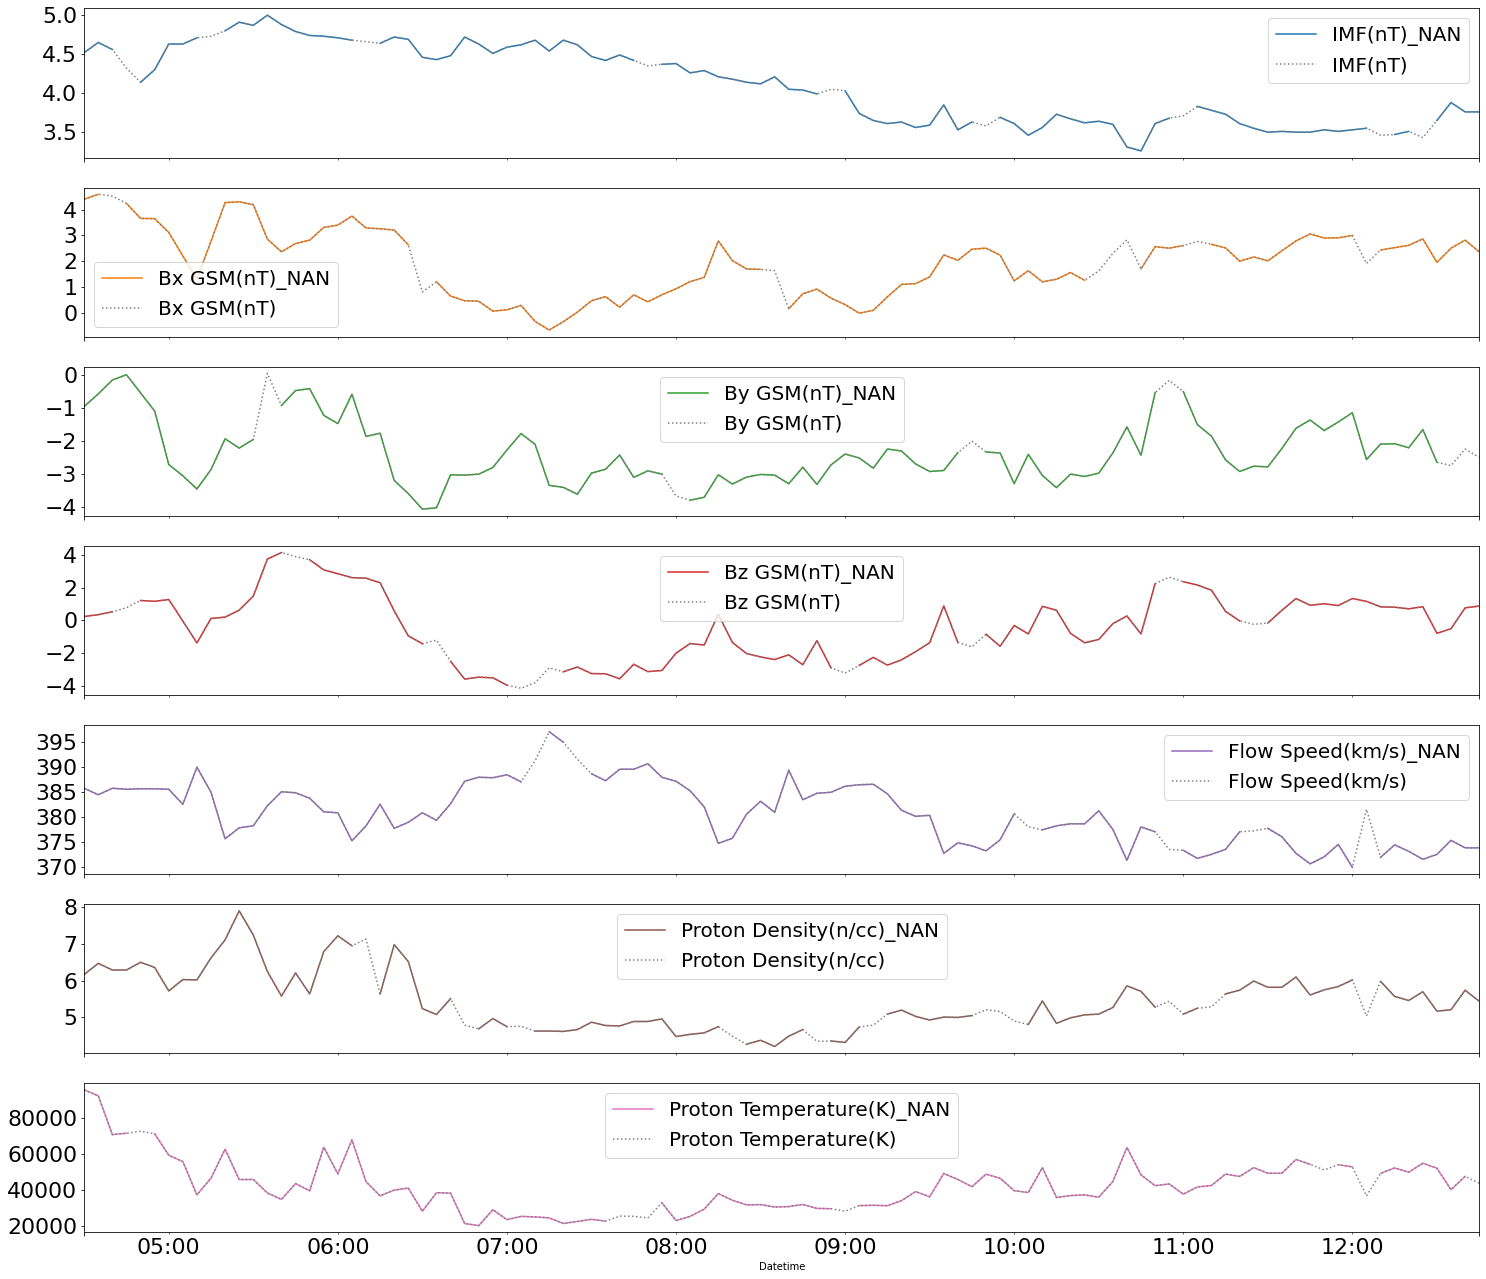

In [12]:
#Grafico para ver de manera clara donde se encuentran los NaN en cada variable (discontinuidad)
plt.rcParams.update({'legend.fontsize': 20})
ax = con_NaN.plot(subplots = True, figsize=(25, 25), markersize = 20)
subconjunto_sin_NaN.plot(ax = ax, subplots = True, figsize=(25, 20), linestyle = ':', color = 'grey', sharex = False,
                        fontsize=22, markersize = 20)


In [13]:
metodos = []

In [14]:
#Imputacion mediante metodos estadisticos/Media
from sklearn.impute import SimpleImputer
imputacion_media = con_NaN.copy()
imputacion_media = imputacion_media.fillna(imputacion_media.mean())
metodos.append(imputacion_media)
imputacion_media = cambiar_nombre_cols(imputacion_media, 'Media', subconjunto_sin_NaN)

In [15]:
#Imputacion mediante metodos estadisticos/Mediana
imputacion_mediana = con_NaN.copy()
imputacion_mediana = imputacion_mediana.fillna(imputacion_mediana.median())
imputacion_mediana = cambiar_nombre_cols(imputacion_mediana, 'Mediana', subconjunto_sin_NaN)
metodos.append(imputacion_mediana)

In [16]:
#Imputacion mediante metodos estadisticos/Moda
imputacion_moda = con_NaN.copy()
imputacion_moda = imputacion_moda.fillna(imputacion_moda.mode().iloc[0])
imputacion_moda = cambiar_nombre_cols(imputacion_moda, 'Moda', subconjunto_sin_NaN)
metodos.append(imputacion_moda)

In [17]:
#Imputacion mediante interpolacion
imputacion_interpolacion = con_NaN.copy()
imputacion_interpolacion = imputacion_interpolacion.interpolate(method='linear', limit_direction='forward')
imputacion_interpolacion = cambiar_nombre_cols(imputacion_interpolacion, 'Interpolacion', subconjunto_sin_NaN)
metodos.append(imputacion_interpolacion)

In [18]:
#Imputacion mediante KNN vecinos uniforme
import numpy as np
from sklearn.impute import KNNImputer
imputacion_KNN = con_NaN.copy()
imputer = KNNImputer(n_neighbors=3, weights = 'uniform')
imputacion_KNN[:] = imputer.fit_transform(imputacion_KNN)
imputacion_KNN = cambiar_nombre_cols(imputacion_KNN, 'KNN-uniforme', subconjunto_sin_NaN)
metodos.append(imputacion_KNN)

In [19]:
#Imputacion mediante KNN vecinos distancia
import numpy as np
from sklearn.impute import KNNImputer
imputacion_KNN = con_NaN.copy()
imputer = KNNImputer(n_neighbors=3, weights = 'distance')
imputacion_KNN[:] = imputer.fit_transform(imputacion_KNN)
imputacion_KNN = cambiar_nombre_cols(imputacion_KNN, 'KNN-distancia', subconjunto_sin_NaN)
metodos.append(imputacion_KNN)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000028AB59C04C0>,
      dtype=object)

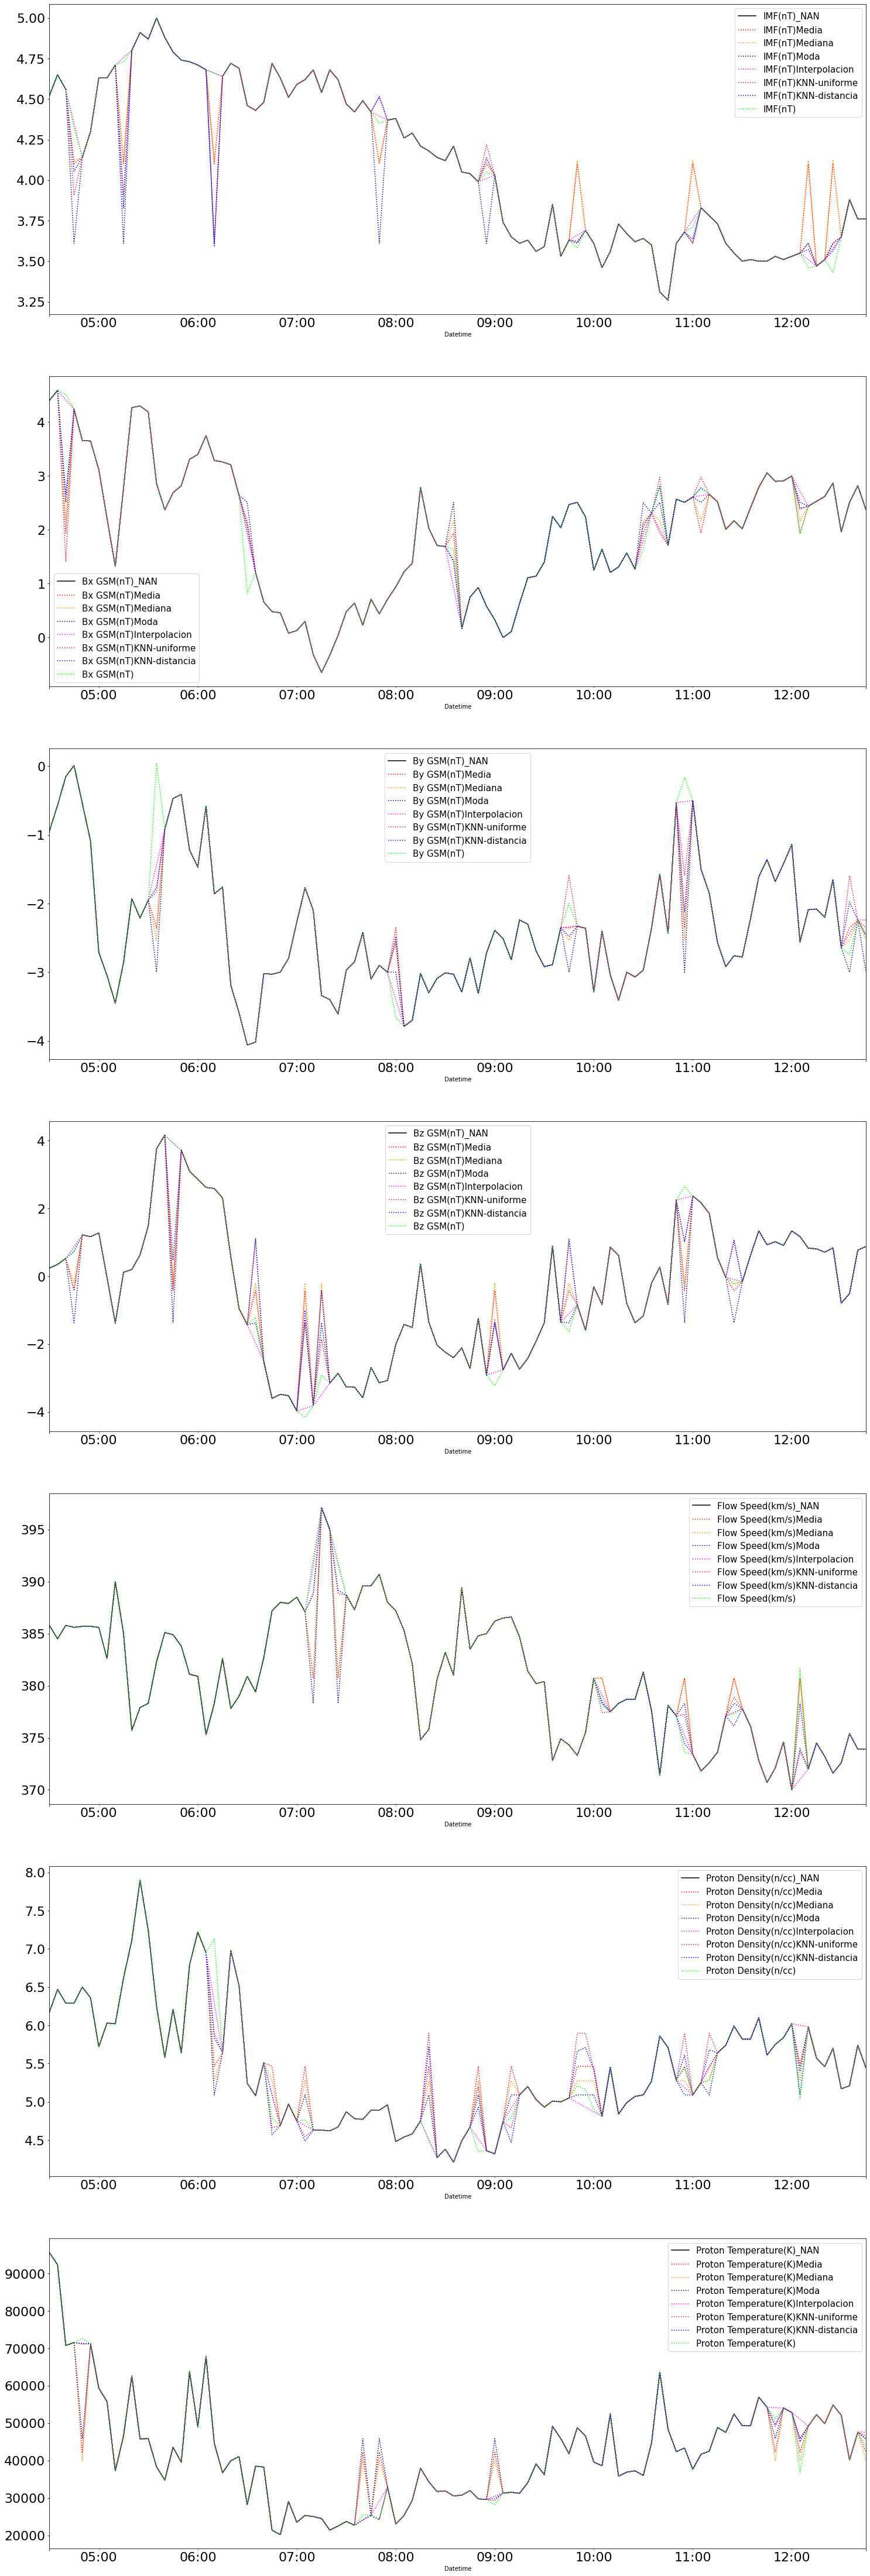

In [20]:
plt.rcParams.update({'legend.fontsize': 15})
ax = con_NaN.plot(subplots = True, figsize=(25, 80), color = 'black', sharex = False, fontsize=22)
colores = ['red', 'darkorange', 'darkblue', 'fuchsia', 'crimson', 'blue']
for metodo in range(len(metodos)):
    metodos[metodo].plot(ax = ax, subplots = True, figsize=(25, 20), linestyle = ':', color = colores[metodo] )
subconjunto_sin_NaN.plot(ax = ax, subplots = True, figsize=(25, 20), linestyle = ':', color = 'lime' )

In [21]:
# Importamos la metrica r2 para comparar de manera cuantitativa los metodos de imputacion
from sklearn.metrics import r2_score
puntuaciones = []
for metodo in range(len(metodos)):
    puntuacion = 0
    for columna in range(1, subconjunto_sin_NaN.shape[1]):
        puntuacion = puntuacion + r2_score(metodos[metodo].iloc[:,columna], subconjunto_sin_NaN.iloc[:,columna])
    puntuacion = puntuacion / (subconjunto_sin_NaN.shape[1] - 1)
    puntuaciones.append(puntuacion)
nombre_metodos = ['Media', 'Mediana', 'Moda', 'Interpolacion', 'KNN Vecinos-uniforme', 'KNN Vecinos-distancia']
puntuaciones

[0.882511776558944,
 0.8842241498031472,
 0.8696478462086633,
 0.9780749596691051,
 0.9236596252753869,
 0.934620415297467]

In [22]:
#r2_score es una metrica que determina el coeficiente de determinacion, sirve para puntuar la regresion, su mejor valor posible es 1
resultados = pd.DataFrame(columns = ['Metodos', 'R_cuadrado'])
resultados.iloc[:,0] = nombre_metodos
resultados.iloc[:,1] = puntuaciones
resultados.sort_values('R_cuadrado', ascending = False)

,Metodos,R_cuadrado
3,Interpolacion,0.978075
5,KNN Vecinos-distancia,0.934620
4,KNN Vecinos-uniforme,0.923660
1,Mediana,0.884224
0,Media,0.882512
2,Moda,0.869648
